## Classification

In [ ]:
from keras.datasets import mnist
import numpy as np
np.random.seed(1337)
import pandas
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from keras.utils import np_utils

## Load the dataset

In [ ]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data() #loading the data

## View the shape

In [ ]:
print('Training data shape : ', X_train.shape, Y_train.shape) #Data check
print('Testing data shape : ', X_test.shape, Y_test.shape)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


# Find the unique classes from the train labels

In [ ]:
classes = np.unique(Y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes) #We have 10 classes, thus the output will have have 10 units

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


## Plot some of the data

Text(0.5, 1.0, 'Ground Truth : 7')

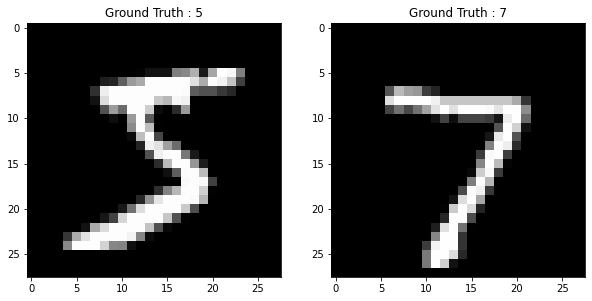

In [ ]:
plt.figure(figsize=[10,5])
 
# Display the first image in training data
plt.subplot(121)
plt.imshow(X_train[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(Y_train[0]))
 
# Display the first image in testing data
plt.subplot(122)
plt.imshow(X_test[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(Y_test[0]))

## Flatten the data

In this notebook we won't be making use of the data as "images" but rather as long vectors of length 784

## This is what an example in the dataset looks like

In [ ]:
X_train[0].shape

(28, 28)

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

## Task: Convert from image shape to a vector shape

We go from 28x28 pixel sized images to a vector of length 784.

We would like to reshape the training data from shape (60000, 28, 28) to (60000,784). To do this, we can make use of Numpy's *reshape* function. 

In [ ]:
X_train.shape #Before Reshaping

(60000, 28, 28)

In [ ]:
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = np.reshape(X_train, (60000,784)) #Reshaping
X_test = np.reshape(X_test, (10000,784))

In [ ]:
X_train.shape #After Reshaping

(60000, 784)

## View the first example

In [ ]:
X_train[0].reshape(-1,1).shape

(784, 1)

# Normalise

We need to normalise the data since the values range from 0 to 255. Training NNs on data ranging between [0,1] can be easier. To do this we simply divide by the maximum value which in this case is 255.

In [ ]:
X_train = X_train/255 # Normalising the data by dividing by 255
X_test = X_test/255 

## One hot encoding

We're going to want our labels as one-hot vectors, which are vectors that holds mostly 0's and one 1. One-hot encoded vectors allow us to map each category in our set of labels to a vector where only a single value is 1.

0 becomes [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

1 becomes [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]

2 becomes [0, 0, 2, 0, 0, 0, 0, 0, 0, 0]

## Before

In [ ]:
Y_test[0] #checking before one-hot encoding

7

In [ ]:
Y_train = np_utils.to_categorical(Y_train)# One-hot enconding the categorical data
Y_test = np_utils.to_categorical(Y_test)

## After

In [ ]:
Y_test[0] #Checking after one-hot encoding

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [ ]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## Task: Create a neural network model

In [ ]:
# Creating the model
def NN():
  
    model = Sequential() #fully connected
    model.add(Dense(750, input_dim=784, activation='relu')) #hidden layer has 750 units,relu activation

    model.add(Dense(10, activation='softmax')) #output layer has 10 units for the qo classes, softmax activation
    
    # Compile model
    model.compile(loss='categorical_crossentropy',  #loss function
                  optimizer='adam',  #optimizer
                  metrics=['accuracy'])
    
    return model

#Initialise the model
model = NN()

## Task: Determine the number of trainable parameters

In [ ]:
model.summary()# Checking Model parameters

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 750)               588750    
                                                                 
 dense_3 (Dense)             (None, 10)                7510      
                                                                 
Total params: 596,260
Trainable params: 596,260
Non-trainable params: 0
_________________________________________________________________


## Task: Begin training

Fit on the training features and targets. Also make use of the validation data you've set aside above. Set the number of epochs, batch size and also explore various *verbose* values.

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.3) #spliting into training and validation data sets

In [ ]:
history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val) ,epochs = 20)# Training the model

Epoch 1/20
1313/1313 [==============================] - 9s 6ms/step - loss: 0.2237 - accuracy: 0.9341 - val_loss: 0.1294 - val_accuracy: 0.9621
Epoch 2/20
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0875 - accuracy: 0.9734 - val_loss: 0.0954 - val_accuracy: 0.9707
Epoch 3/20
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0546 - accuracy: 0.9830 - val_loss: 0.0936 - val_accuracy: 0.9736
Epoch 4/20
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0372 - accuracy: 0.9879 - val_loss: 0.0945 - val_accuracy: 0.9741
Epoch 5/20
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0284 - accuracy: 0.9905 - val_loss: 0.0864 - val_accuracy: 0.9758
Epoch 6/20
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0194 - accuracy: 0.9938 - val_loss: 0.1069 - val_accuracy: 0.9731
Epoch 7/20
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0190 - accuracy: 0.9937 - val_loss: 0.0974 - val_accuracy:

## Task: Predict on the test data

In [ ]:
prediction = model.predict(X_test)# PRECDICTING ON THE TEST DATA

In [ ]:
prediction #Data checking

array([[3.5922366e-21, 3.7086123e-22, 6.4408332e-18, ..., 1.0000000e+00,
        1.6312532e-24, 3.9551348e-16],
       [2.5121264e-18, 5.2477410e-17, 1.0000000e+00, ..., 1.0422060e-23,
        1.5677659e-19, 1.6928749e-30],
       [6.5904721e-19, 9.9999928e-01, 2.4532537e-10, ..., 6.7395678e-07,
        4.1136092e-10, 3.6960934e-16],
       ...,
       [2.6202762e-30, 2.2068490e-21, 5.7530781e-26, ..., 9.4753298e-15,
        2.0531106e-16, 1.5600771e-10],
       [4.9842555e-17, 1.3983196e-20, 1.4202954e-29, ..., 1.8584240e-21,
        8.3300811e-11, 1.4542926e-22],
       [2.4128431e-23, 8.5514299e-31, 1.0018129e-24, ..., 4.9404785e-29,
        3.0990722e-24, 1.8957251e-25]], dtype=float32)

In [ ]:
prediction[0] #The highest probability corresponds to a 7. Before converting to classes

array([3.59223659e-21, 3.70861233e-22, 6.44083315e-18, 3.12831436e-17,
       2.00497974e-28, 2.03665979e-23, 1.31407705e-33, 1.00000000e+00,
       1.63125322e-24, 3.95513485e-16], dtype=float32)

# Converting to categories

In [ ]:
prediction_classes = np.argmax(prediction, axis=1)#conveting the model output to its equivalent categories
prediction_classes 

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
prediction_classes[0] #The class output corresponds with the softmax network output

7

In [ ]:
accuracy_score(np.argmax(Y_test,1), prediction_classes) #checking the accuracy of the model

0.9805

In [ ]:
confusion_matrix(np.argmax(Y_test,1), prediction_classes) #One way of checking the performance of the model

array([[ 972,    1,    1,    0,    1,    0,    2,    0,    1,    2],
       [   0, 1126,    1,    2,    0,    1,    2,    0,    3,    0],
       [   6,    3, 1005,    2,    3,    0,    1,    4,    7,    1],
       [   0,    0,    4,  988,    0,    3,    0,    4,    4,    7],
       [   1,    0,    2,    0,  961,    1,    3,    1,    2,   11],
       [   2,    0,    0,    9,    2,  872,    2,    1,    1,    3],
       [   5,    3,    1,    1,    6,    3,  935,    0,    4,    0],
       [   0,    3,    5,    0,    0,    0,    0, 1009,    2,    9],
       [   3,    0,    2,    7,    5,    4,    0,    3,  944,    6],
       [   1,    2,    0,    2,    5,    4,    0,    2,    0,  993]])

# Comparing the the model performance on the training data and Validation data

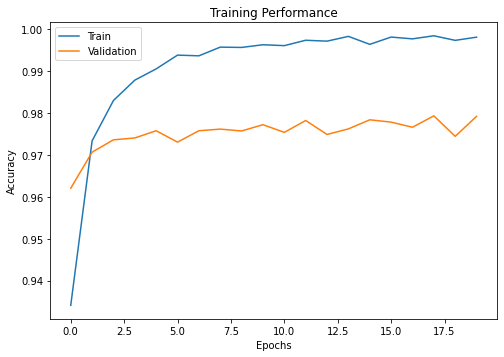

In [ ]:
#ploting the performance of the training model and its performance on the validation data 
def plot_hist(h, xsize=6, ysize=10):

    fig_size = plt.rcParams["figure.figsize"]
    plt.rcParams["figure.figsize"] = [xsize, ysize]
    fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True)
    
    # summarize history for Accuracy
    plt.subplot(211)
    plt.plot(h['accuracy'])
    plt.plot(h['val_accuracy'])
    plt.title('Training Performance')
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.legend(['Train', 'Validation'], loc='best')
    
    plt.draw()
    plt.show()

    return
plot_hist(history.history, xsize=8, ysize=12)